Hierarchical Agglomerative Clustering Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from sklearn.preprocessing import StandardScaler

Reading Data Set which is named as BR_mod.csv

In [2]:
dataset=pd.read_csv('BR_mod.csv')

Using fillna function of pandas for filling missing values. ffill for Forward filling and bfill for Backward filling

In [3]:
dataset.fillna(method='ffill',limit=54,inplace= True)
dataset.fillna(method='bfill',limit=54,inplace= True)
dataset.fillna(method='ffill',limit=54,inplace= True)
dataset.fillna(method='bfill',limit=54,inplace= True)

Checking number of null values in after filling.

In [4]:
dataset.isnull().sum().sum()

0

Here, I am using PCA(principal component analysis) for dimensionality reduction for proper visualization

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dataset)
df = pd.DataFrame(data = principalComponents , columns = ['x', 'y'])

In [6]:
e = pd.DataFrame(df)

In [7]:
A = e.iloc[:,[0,1]].values

In [8]:
x =e.iloc[:,[0]].values

In [9]:
y= e.iloc[:,[1]].values

In [10]:
a=distance_matrix(x,y)

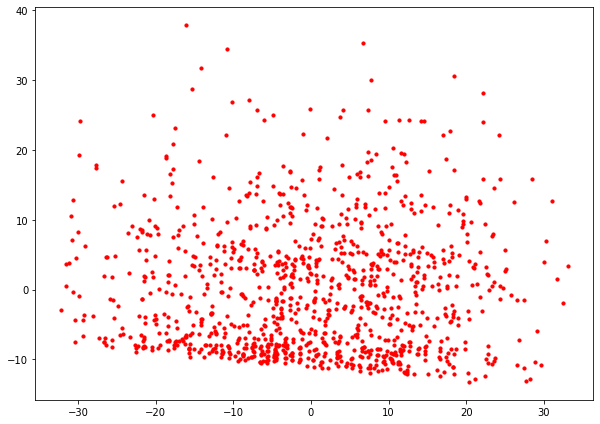

In [11]:
labels = range(0)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(x,y, label='True Position',color='red',s=10)

for label, i, j in zip(labels, x, y):
    plt.annotate(
        label,
        xy=(i, j), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [15]:
X=df.to_numpy()
X=X[0:1097,:-1]

In [16]:
class Distance_computation_grid(object):

    #class to enable the Computation of distance matrix 
    def __init__(self):
        pass
    
    def compute_distance(self,samples):

    #Creates a matrix of distances between individual samples and clusters attained at a particular step
        
        Distance_mat = np.zeros((len(samples),len(samples)))
        for i in range(Distance_mat.shape[0]):
            for j in range(Distance_mat.shape[0]):
                if i!=j:
                    Distance_mat[i,j] = float(self.distance_calculate(samples[i],samples[j]))
                else:
                    Distance_mat[i,j] = 10**4
        return Distance_mat
    
    
    def distance_calculate(self,sample1,sample2):
        
     # Distance calulated between two samples. The two samples can be both samples, both clusters or one cluster and one sample.
        dist = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                try:
                    dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
                except:
                    dist.append(self.intersampledist(sample1[i],sample2[j]))
        return min(dist)
    
    
    def intersampledist(self,s1,s2):
    
            #To be used in case we have one sample and one cluster.
    
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s2[i],s1[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s1[i],s2[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return min(dist)
    
    def interclusterdist(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return min(dist)
    

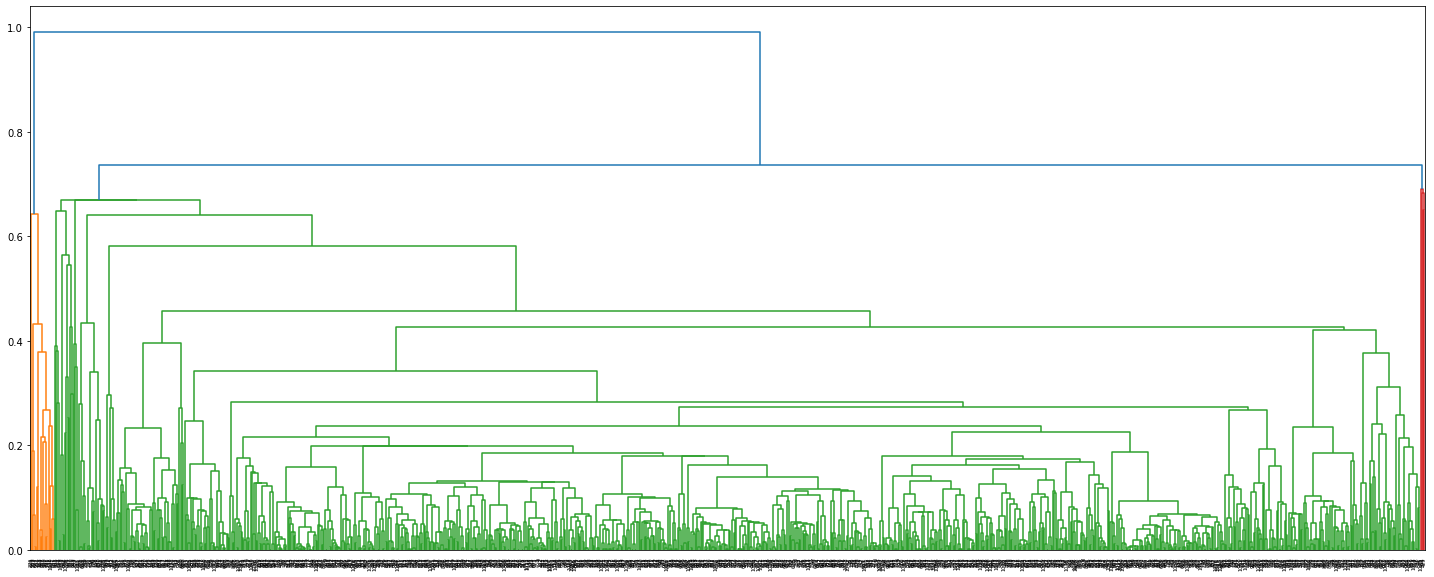

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

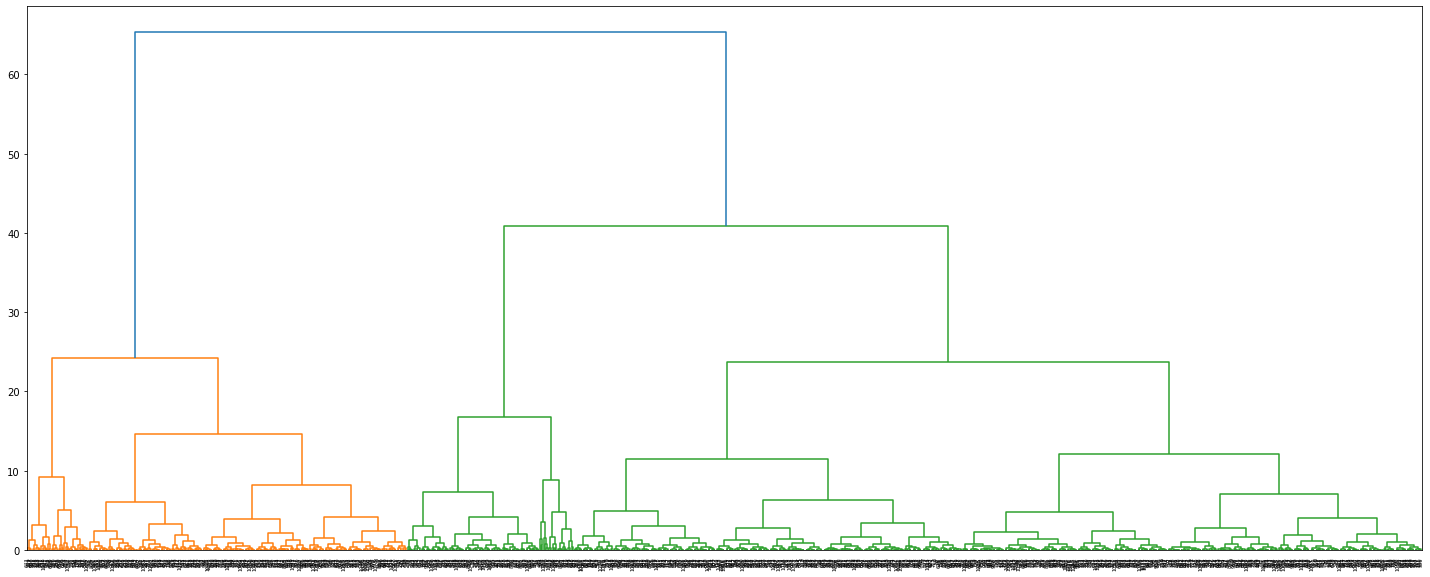

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

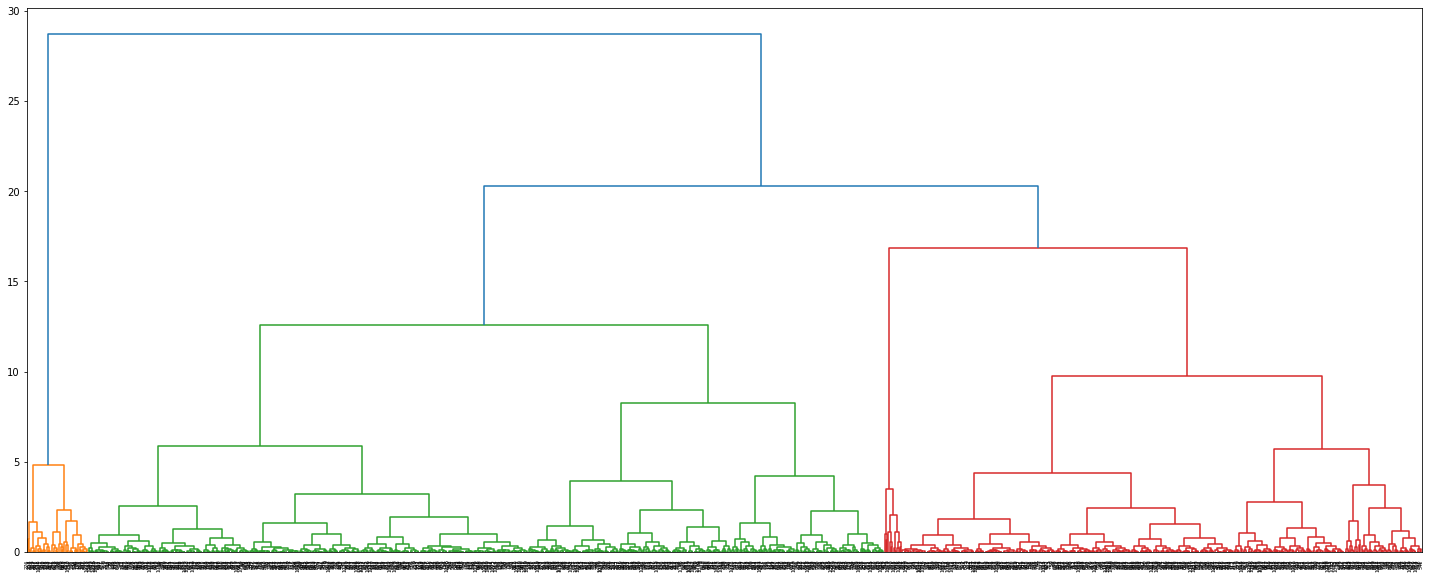

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'average')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)


In [71]:
progression = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
m = len(samples)
distcal  = Distance_computation_grid()


while m!=2:
    print('Sample size before clustering    :- ',m)
    Distance_mat      = distcal.compute_distance(samples)
    sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
    value_to_add      = samples.pop(sample_ind_needed[1])
    samples[sample_ind_needed[0]].append(value_to_add)
    
    print('Cluster Node 1                   :-',progression[sample_ind_needed[0]])
    print('Cluster Node 2                   :-',progression[sample_ind_needed[1]])
    
    progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
    progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
    v = progression.pop(sample_ind_needed[1])
    m = len(samples)
    
    print('Progression(Current Sample)      :-',progression)
    print('Cluster attained                 :-',progression[sample_ind_needed[0]])
    print('Sample size after clustering     :-',m)
    print('\n')

Sample size before clustering    :-  20
Cluster Node 1                   :- [1]
Cluster Node 2                   :- [4]
Progression(Current Sample)      :- [[0], [[1, [4]]], [2], [3], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19]]
Cluster attained                 :- [[1, [4]]]
Sample size after clustering     :- 19


Sample size before clustering    :-  19
Cluster Node 1                   :- [[1, [4]]]
Cluster Node 2                   :- [18]
Progression(Current Sample)      :- [[0], [[[1, [4]], [18]]], [2], [3], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [19]]
Cluster attained                 :- [[[1, [4]], [18]]]
Sample size after clustering     :- 18


Sample size before clustering    :-  18
Cluster Node 1                   :- [11]
Cluster Node 2                   :- [16]
Progression(Current Sample)      :- [[0], [[[1, [4]], [18]]], [2], [3], [5], [6], [7], [8], [9], [10], [[11, [16]]], [12], [13], [14], [15], [17],

C:\Users\KESHAV\AppData\Local\Temp/ipykernel_3540/81043750.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))


 [2]
Cluster Node 2                   :- [12]
Progression(Current Sample)      :- [[[0, [[11, [16]]]]], [[[1, [4]], [18]]], [[2, [12]]], [[3, [7]]], [5], [6], [8], [9], [10], [13], [14], [15], [17], [19]]
Cluster attained                 :- [[2, [12]]]
Sample size after clustering     :- 14


Sample size before clustering    :-  14
Cluster Node 1                   :- [[[1, [4]], [18]]]
Cluster Node 2                   :- [14]
Progression(Current Sample)      :- [[[0, [[11, [16]]]]], [[[[1, [4]], [18]], [14]]], [[2, [12]]], [[3, [7]]], [5], [6], [8], [9], [10], [13], [15], [17], [19]]
Cluster attained                 :- [[[[1, [4]], [18]], [14]]]
Sample size after clustering     :- 13


Sample size before clustering    :-  13
Cluster Node 1                   :- [[2, [12]]]
Cluster Node 2                   :- [9]
Progression(Current Sample)      :- [[[0, [[11, [16]]]]], [[[[1, [4]], [18]], [14]]], [[[2, [12]], [9]]], [[3, [7]]], [5], [6], [8], [10], [13], [15], [17], [19]]
Cluster attain